## <center>Изменение формы клюва галапагосских вьюрков в течение четырех десятилетий: Исследование с использованием статистических методов (бутстрэппинг, проверка гипотез, линейная регрессия)</center> 

                                       Проект (код, текст, графики) выполнил и оформил Резвухин Д.И., 
                                       обучающая платформа DataCamp (https://www.datacamp.com), июнь 2022 г.

### Введение

Как известно, многие из важнейших наблюдений, которые привели к развитию теории эволюции, были сделаны Чарльзом Дарвином на Галапагосском архипелаге, особенно при изучении населяющих их мелких птиц — вьюрков. Галапагосские острова — это идеальная локация для изучения эволюции, так как эти участки суши являются фактически изолированными, а популяции, их населяющие, не взаимодействуют с другими биологическими видами (в том числе и с Homo Sapiens). Кроме того, некоторые из островов архипелага являются совсем небольшими — на таких островках можно отслеживать популяции особей в целом.

Каждый год с 1973 по 2012 гг. биологи Peter и Rosemary Grant (Университет Принстона) проводили по несколько месяцев на небольшом вулканическом острове Большой Дафни (Daphny Major) в пределах Галапагосского архипелага. На этом острове представлено два вида вьюрков: *Geospiza fortis* и *Geospiza scandens*. Гранты изучали их каждый год, делая физиологические измерения, присваивая ярлычки, собирая образцы ДНК и т.д. В 2014 г. они опубликовали книгу "40 Years of Evolution: Darwin's Finches on Daphne Major Island" и разместили все полученную базу данных на репозитории Dryad в свободном доступе. Этот датасет является отличным набором данных для использования в области Data Science и при построении статистических выводов при изучении проблем эволюции. 

Цель данного проекта заключается в том, чтобы определить, изменилась ли форма клюва вьюрков вида *Geospiza scandens* за 37-летний временной интервал. В рамках проекта мы рассмотрим различные аспекты геометрии клюва, в том числе и то, как его форма менялась со временем и как особенности клюва потомства зависели от формы клюва родителей. Мы начнем с предварительного анализа данных по этому виду в 1975 и 2012 годах, далее применим методы статиcтического анализа, такие как бутстрэппинг, проверка статистических гипотез и линейная регрессия. 



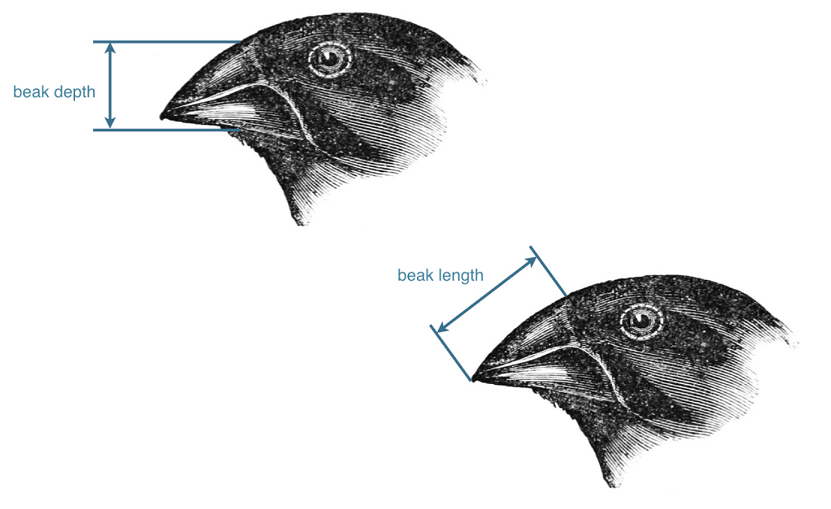

<center><b>Рис. 1.</b> Голова вьюрка вида <i>Geospiza fortis</i> с указанием, что считается высотой (мощностью) клюва (depth) и длиной (length).</center> 
   
<center>Source: Darwin's finches or Galapagos finches. Darwin, 1845. Journal of researches into the natural history and geology of the countries visited during the voyage of H.M.S. Beagle round the world, under the Command of Capt. Fitz Roy, R.N. 2d edition. Author: John Gould (14.Sep.1804 - 3.Feb.1881)</center> 

### 1. Импортирование библиотек и знакомство с датасетами

В нашем распоряжении находится два `.csv` файла, в которых хранятся данные о параметрах клюва вьюрков по результатам измерений на вулканическом острове Большой Дафни в 1975 году (`finch_beaks_1975.csv`) и 2012 году (`finch_beaks_2012.csv`). Импортируем необходимые библиотеки, загрузим датасеты и посмотрим их структуру.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# улучшим качество графиков, переведя их в векторный формат svg
import matplotlib_inline.backend_inline  
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')  

data_1975 = pd.read_csv('finch_beaks_1975.csv')
data_2012 = pd.read_csv('finch_beaks_2012.csv')
display(data_1975.head())
display(data_2012.head())

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


Датасеты являются достаточно простыми. Каждый ряд соответствует одной особи, столбцы отражают некоторые характеристики, в частности, принадлежность птицы к определенному виду (*scandens* либо *fortis*), а также длину и мощность клюва в миллиметрах.   

In [2]:
"""Добавим в каждый датафрейм столбец `year`, 
   в каждой ячейке которого будет соответствующий датасету год (это понадобится позднее для визуализации)."""

data_1975['year'] = '1975'
data_2012['year'] = '2012'
data_2012.columns = data_1975.columns

"""Поскольку нас пока интересует только вид scandens, 
   сделаем фильтр по виду и объединим оба файла в один датафрейм `scandens`."""

scandens_1975 = data_1975[data_1975['species'] == 'scandens']
scandens_2012 = data_2012[data_2012['species'] == 'scandens']

scandens = pd.concat([scandens_1975, scandens_2012], ignore_index=True)
scandens.info()
scandens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             214 non-null    int64  
 1   species          214 non-null    object 
 2   Beak length, mm  214 non-null    float64
 3   Beak depth, mm   214 non-null    float64
 4   year             214 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.5+ KB


,band,species,"Beak length, mm","Beak depth, mm",year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975
...,...,...,...,...,...
209,21295,scandens,14.2,9.3,2012
210,21297,scandens,13.0,9.8,2012
211,21340,scandens,14.6,8.9,2012
212,21342,scandens,13.1,9.8,2012


Пропущенных значений в датафрейме нет, все 214 измерений готовы для дальнейшего исследования.

In [3]:
"""В завершение вводной части, переведем сделанные измерения высот и длин клювов в четыре `np.array`. 
   Это позволит более оперативно работать с ними и использовать в функциях."""

bd_1975 = scandens_1975['Beak depth, mm'].values
bl_1975 = scandens_1975['Beak length, mm'].values
bd_2012 = scandens_2012['Beak depth, mm'].values
bl_2012 = scandens_2012['Beak length, mm'].values

### 2. Изменилась ли за время наблюдений (1975-2012) мощность клюва *Geospiza scandens*?

#### 2.1 Предварительный разведочный анализ данных (EDA)

Для начала посмотрим разницу в распределениях значений мощности клюва вьюрков по годам (для 1975 и 2012 гг.). Это позволит сразу же получить некоторое представление о распределениях, а также визуально сравнить их друг с другом. Для этой цели хорошо подойдет график `swarmplot`. В данном случае он покажет характер распределений по годам без наложения точек друг на друга.

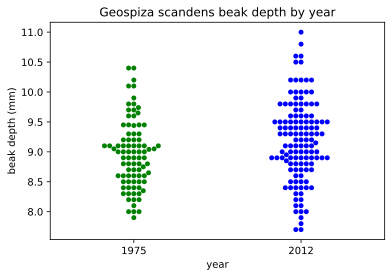

In [4]:
sns.swarmplot(x='year', y='Beak depth, mm', data=scandens, palette=['g', 'b'])
plt.title('Geospiza scandens beak depth by year')
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.show()

Как следует из графика, средняя мощность клюва за 37 лет, по-видимому, несколько увеличилась, также распределение значений для 2012 года имеет более высокую дисперсию. Однако какой-либо определенный вывод здесь сделать сложно, распределения сильно перекрываются по значениям. 

Попробуем также построить графики функции распределения (empirical cumulative probability function, ecdf). Они хорошо подходят для предварительного оценочного анализа распределений, так как показывают информацию для каждого процентиля. 

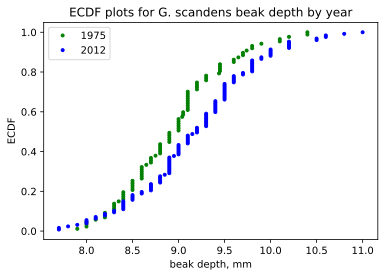

In [5]:
"""Напишем простую функцию, которая принимает набор данных и возвращает (x, y) значения для построения графика ecdf. 
   Можно также использовать ecdfplot из библиотеки seaborn, 
   но преимуществом кастомной функции является построение графика без горизонтальных 'ступенек'."""

def ecdf(data):
    """Возвращает x, y значения для функции ECDF для одномерного набора данных."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y


x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

plt.plot(x_1975, y_1975, marker='.', linestyle='none', label='1975', color='g')
plt.plot(x_2012, y_2012, marker='.', linestyle='none', label='2012', color='b')
plt.title('ECDF plots for G. scandens beak depth by year')
plt.xlabel('beak depth, mm')
plt.ylabel('ECDF')
plt.legend()
plt.show()

На графике хорошо видно, что кумулята распредения 2012 г. по большей части находится правее кумуляты распределения 1975 г. Это означает, что почти для каждого процентиля (кроме самых первых до 10) значение мощности клюва больше для данных 2012 г. по сравнению с данными 1975 г. Или, другими словами, для любого значения мощности клюва (кроме самых низких значений), пропорция менее мощных клювов ниже для распределения 2012 г. по сравнению с распределением 1975 г. Здесь также четко видно, что у более нового распределения выше среднее и выше дисперсия.

#### 2.2 Построение доверительных интервалов для параметра с использованием бутстрэппинга

Мы можем рассчитать доверительный интервал для разницы в средней мощности клюва (между распределениями 1975 и 2012 гг.), используя метод бутстрэппинга на базе имеющихся выборок. Для этого мы будем многократно извлекать выборки с возвращением из имеющихся данных. Размер таких выборок будет соответствовать размеру исходных выборок. Для каждой полученной бутстрэп-выборки посчитаем среднее, чтобы в итоге получить два сгенерированных выборочных распределения, которые будут состоять из множества рассчитанных средних. После этого для каждой получившейся пары значений, одно из которых соответствует 1975 году, а второе — 2012 году, посчитаем разницу в средней длине клюва (вычтем один набор значений из другого). 

Данный подход позволит понять, как варьировала бы разница в мощности клюва, если бы мы имели дело с множеством других возможных выборок из генеральной совокупности, а также определить интервал, в котором лежит истинное значение генеральной совокупности с определенным уровнем доверительной вероятности. 

Например, сгенерированное множество выборок (n = 50) на базе выборки значений мощности клюва 1975 года можно визуализировать следующим образом. Построим графики функции распределения, причем красным цветом выделим фактическую выборку, а серыми точками — бустрэп-выборки:

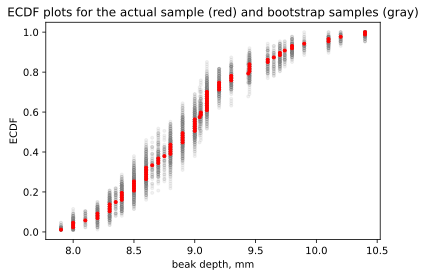

In [6]:
for _ in range(50):
    bs_sample = np.random.choice(bd_1975, size=len(bd_1975))
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

x, y = ecdf(bd_1975)
plt.plot(x, y, marker='.', linestyle='none', color='r')

plt.title('ECDF plots for the actual sample (red) and bootstrap samples (gray)')
plt.xlabel('beak depth, mm')
plt.ylabel('ECDF')
plt.show()

Как видно из графика, фактическое распределение находится как бы в центре, а бутстрэп-распределения формируют вокруг него некоторую область значений, отражающую значения признака в других выборках, взятых из той же генеральной совокупности.

Далее будем действовать похожим образом для расчета доверительного интервала для разницы в средней мощности клюва (между распределениями 1975 и 2012 гг.). 

In [7]:
"""Для этого создадим две функции (они понадобятся и далее). 
   Первая функция принимает набор данных и функцию для расчета тестовой статистики (например, `np.mean`), 
   создает новую выборку (с возвращением) на базе имеющегося набора данных 
   и возвращает необходимую тестовую статистику. 
   
   Вторая функция использует первую и создает распределение тестовых статистик (выборочное распределение) 
   из многократно сгенерированных бутстрэп-выборок.
   
   После этого рассчитаем разницу в средних для каждой пары и построим доверительный интервал, 
   а также гистограмму распределения."""

def bs_replicate(data, func):
    """Генерирует бутстрэп-выборку и считает для нее тестовую статистику."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def generate_bs_replicates(data, func, size=1):
    """Генерирует выборочное распределение из множества значений тестовых статистик,
       посчитанных для множества бутстрэп-выборок."""
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bs_replicate(data, func)

    return bs_replicates


#################################################################################################

# зададим начальные условия для генератора случайных чисел, с целью воспроизводимости результатов
np.random.seed(42)

# рассчитаем наблюдаемую разницу в средних между выборками
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# сгенерируем два выборочных распределения из средних значений бутстрэп-выборок
bs_replicates_1975 = generate_bs_replicates(bd_1975, np.mean, size=10000)
bs_replicates_2012 = generate_bs_replicates(bd_2012, np.mean, size=10000)

# вычтем одно распределение из другого, чтобы получить 10000 разностей средних
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# посчитаем 95% доверительный интервал распределения разностей средних
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
print('Observed difference of means =', round(mean_diff, 3), 'mm')
print('95% confidence interval =', np.round(conf_int, 3), 'mm')

Observed difference of means = 0.226 mm
95% confidence interval = [0.056 0.392] mm


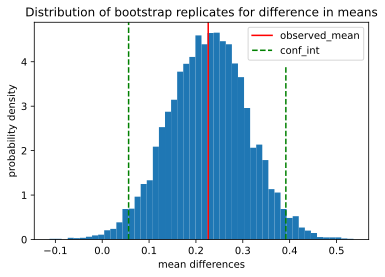

In [8]:
plt.hist(bs_diff_replicates, bins=50, density=True)
plt.axvline(x=mean_diff, color='r', label='observed_mean')
plt.axvline(x=conf_int[0], color='g', label='conf_int', linestyle='--')
plt.axvline(x=conf_int[1], color='g', ymax=0.8, linestyle='--')
plt.title('Distribution of bootstrap replicates for difference in means')
plt.xlabel('mean differences')
plt.ylabel('probability density')
plt.legend()
plt.show()

Наблюдаемая разница между средними длинами клюва составляет 0.226 мм, при 95% доверительном интервале от 0.056 до 0.392 мм. Таким образом, на основе разведочного анализа, почва для предположения о том, что мощность клюва вьюрков *Geospiza scandens* действительно увеличилась, у нас есть. Однако возможно ли, что наблюдаемое различие абсолютно случайно? Другими словами, какова вероятность того, что наблюдаемое различие будет таковым при условии, что средние двух распределений равны?

#### 2.3 Проверка статитической гипотезы о равенстве средних

Сформулируем нулевую гипотезу. Предположим, что средние значения высоты клюва вьюрков вида *Geospiza scandens* в обеих выборках (1975 и 2012 гг.) равны, т.е. мощность клюва со временем не изменилась. Альтернативная гипотеза будет утверждать, что средняя высота клюва в выборке 2012 г. больше, чем в выборке 1975 г. Выберем уровень значимости $\alpha$ = 0.05.

Необходимо подчеркнуть, что мы проверяем гипотезу не о том, что выборки взяты из одного распределения и в силу этого не обладают статистически значимыми различиями в значениях тестовой статистики, как было бы в случае перестановочного тестирования (permutation test), часто применяемого, например, в клинической практике. Во-первых, это не соотносится с самой природой такого эксперимента. Между измерениями прошло 37 лет, соответственно, мы исследуем разные группы птиц, хоть они и принадлежат к одному виду. Во-вторых, нас интересует именно разница в мощности клюва как тестовая статистика, чтобы определить, произошло ли статистически значимое изменение. В таком случае, более корректно использовать бутстрэппинг для проверки гипотезы, то есть на базе существующих распределений по отдельности, без перемешивания, как это происходит при перестановочном тестировании.

Чтобы выполнить проверку гипотезы о равенстве средних, требуется сдвинуть значения в двух наборах данных так, чтобы они имели одинаковое среднее, а затем использовать бутстрэп-выборки для вычисления разности средних значений. Таким образом, изначально мы действуем как бы в рамках истинности нулевой гипотезы, и искусственно приводим данные к единому среднему. P-уровень значимости будет рассчитываться как пропорция значений в распределении, которые равны или больше, чем наблюдаемая разница.

В данном случае мы также могли бы использовать t-критерий Стьюдента для независимых выборок. Ниже мы покажем, что оба метода (бутстрэппинг и t-тест) дают примерно одинаковые результаты.

In [9]:
np.random.seed(42)

# посчитаем среднее объединенного набора данных
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# произведем сдвиг выборок таким образом, чтобы их средние стали равны
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# сгенерируем два распределения из средних значений бутстрэп-выборок, используя функции, написанные ранее
bs_replicates_1975_shifted = generate_bs_replicates(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012_shifted = generate_bs_replicates(bd_2012_shifted, np.mean, size=10000)

# вычтем одно распределение из другого, чтобы получить 10000 разностей средних
bs_diff_replicates_shifted = bs_replicates_2012_shifted - bs_replicates_1975_shifted

# рассчитаем p-уровень значимости (это пропорция значений, которые равны или больше, чем наблюдаемая разница)
p = np.mean(bs_diff_replicates_shifted >= mean_diff)
print('p =', p)

p = 0.0034


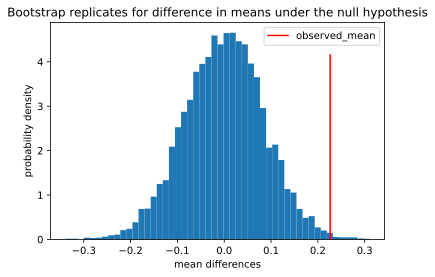

In [10]:
plt.hist(bs_diff_replicates_shifted, bins=50, density=True)
plt.axvline(x=mean_diff, color='r', label='observed_mean', ymax=0.85)
plt.title('Bootstrap replicates for difference in means under the null hypothesis')
plt.xlabel('mean differences')
plt.ylabel('probability density')
plt.legend()
plt.show()

Полученное значение p-уровня значимости является очень низким и составляет 0.0034. Это означает, что если бы средние двух выборок были равны, то вероятность получить наблюдаемую разницу в 0.226 мм случайным образом составляла бы всего 0.34%, что существенно ниже $\alpha$ = 0.05. Таким образом, вероятность чисто случайных различий крайне низка, и нам следует отклонить нулевую гипотезу о равенстве средних. Наблюдаемая разница в мощности клюва вьюрков является статистически значимой.

Покажем, что расчет p-уровня значимости с использованием t-критерия Стьюдента для двух независимых выборок даст похожий результат. Библиотека `pingouin` позволяет это сделать очень просто:

In [11]:
import pingouin as pg
stats = pg.ttest(bd_2012, bd_1975, alternative='greater')
p_val = stats.loc['T-test', 'p-val']
print(f'p-value using t-test is {p_val:.4f}')

p-value using t-test is 0.0042


### 3. Изменилась ли форма клюва в целом?

Мы определили, что различия в мощности клюва вьюрков вида Geospiza scandens в 1975 и 2012 гг. являются статистически значимыми. Существует несколько предположений касательно того, почему это происходит. Так, согласно одной из версий, засуха в 1976 и 1977 гг. привела к гибели растений, мелкие семена которых птицы употребляли в пищу. Чтобы расколоть более крупные семена, вьюркам требовался более высокий в основании (более мощный) клюв. Соответственно, особи с более мощным клювом выживали и размножались. 

Однако если это так, то, вероятно, и длина клюва тоже должна была увеличиться. В таком случае геометрия (форма) клюва с течением времени меняться не должна; растет только размер. Если же ширина и длина клюва меняются по разному, то должна измениться форма клюва. В следующем части мы проверим эти предположения, используя линейную зависимость между длиной и мощностью клюва.

#### 3.1 Предварительный разведочный анализ данных

Построим график рассеяния (scatter plot), на котором будет отображено взаимоотношение между длиной и мощностью клюва вьюрков.

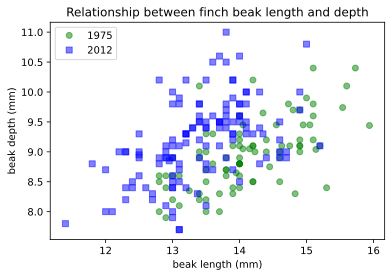

In [12]:
plt.plot(bl_1975, bd_1975, marker='o', linestyle='None', alpha=0.5, color='g', markersize=6)
plt.plot(bl_2012, bd_2012, marker='s', linestyle='None', alpha=0.5, color='b', markersize=6)
plt.title('Relationship between finch beak length and depth')
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')
plt.show()

Из получившегося графика следует, что клювы становятся мощнее (синие квадраты, соответствующие данным 2012 года, располагаются в среднем выше по оси Y), однако не длиннее. Интересно, что они стали даже короче (синие квадраты в среднем левее по оси Х, чем зеленые кружки). Таким образом, вероятно, форма клюва вьюрков со временем меняется — они становятся больше в вертикальном направлении (мощнее), но укорачиваются в длину.

#### 3.2 Оценка параметров линейной регрессии

Для того, чтобы получить возможные дополнительные свидетельства высказанного выше предположения, можно использовать метод линейной регрессии. Здесь мы имеем дело с двумя наборами данных, между которыми есть выраженная корреляция, поэтому линейная регрессия является подходящим методом.

Посчитаем угловой коэффициент и свободный член для обоих наборов данных. После этого опять применим бутстэппинг, чтобы рассчитать доверительные интервалы. 

In [13]:
"""Здесь мы не можем генерировать бутстрэп-выборки, пользуясь функцией из предыдущей части, 
   так как теперь рассматриваются два набора связанных данных. 
   Мы можем, однако, видоизменить эту функцию так, чтобы она делала выборку с возвращением из набора индексов 
   (общее количество которых соответствует размеру исходных выборок), 
   после чего производила индексацию наборов данных по полученной выборке индексов. 
   Это позволит получить бутстрэп-выборки для двух наборов связанных между собой данных (парный бутстреппинг). 
   Мы также построим новый график с визуализацией линий регресcии для сгенерированных параметров."""

def draw_bs_pairs_linreg(x, y, size=1):
    """Производит парный бутстрэппинг для линейной регрессии."""

    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


#############################################################################################

np.random.seed(42)

# посчитаем наблюдаемые значения углового коэффициента и интерсепта
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# проведем парный бутстрэппинг, многократно генерируя реплики параметров регрессии
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# посчитаем доверительные интервалы для этих параметров
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

print('1975: slope =', round(slope_1975, 3),
      '95% confidence interval =', np.round(slope_conf_int_1975, 3))
print('1975: intercept =', round(intercept_1975, 3),
      '95% confidence interval =', np.round(intercept_conf_int_1975, 3))
print('2012: slope =', round(slope_2012, 3),
      '95% confidence intervalt =', np.round(slope_conf_int_2012, 3))
print('2012: intercept =', round(intercept_2012, 3),
      '95% confidence interval =', np.round(intercept_conf_int_2012, 3))

1975: slope = 0.465 95% confidence interval = [0.339 0.593]
1975: intercept = 2.391 95% confidence interval = [0.649 4.18 ]
2012: slope = 0.463 95% confidence intervalt = [0.331 0.607]
2012: intercept = 2.977 95% confidence interval = [1.068 4.706]


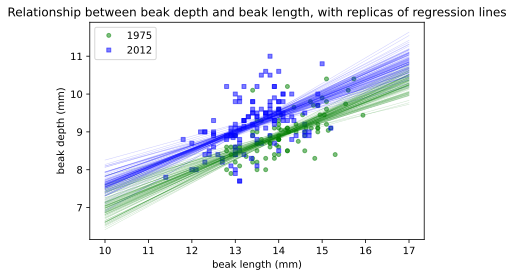

In [14]:
plt.plot(bl_1975, bd_1975, marker='o', linestyle='none', color='g', alpha=0.5, markersize=4)
plt.plot(bl_2012, bd_2012, marker='s', linestyle='none', color='b', alpha=0.5, markersize=4)
plt.title('Relationship between beak depth and beak length, with replicas of regression lines')
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

x = np.array([10, 17])

'''Построим линии регрессии на основе множества рассчитанных значений углового коэффициента и свободного члена, 
   возьмем первые сто.
   Примерно так библиотека `seaborn` рисует затененную область, соответствующую доверительным интервалам, 
   на графике `sns.regplot`.'''

for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='g')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='b')
plt.show()

Согласно произведенным расчетам, наборы данных имеют почти одинаковые угловые коэфициенты, но разные свободные члены. Угловые коэффициенты свидетельствуют о том, что с ростом длины клюва на один миллиметр, высота клюва увеличивается примерно на половину миллиметра (в пределах популяции, то есть года измерений). 

###  3.3. Изменение отношения длины клюва к его мощности

В предыдущих разделах мы выяснили, что существует линейная зависимость между длиной клюва и его мощностью (в пределах года измерения). Однако если нас интересует изменение **формы** клюва по времени, то нужно сравнивать **отношения длины клюва к его мощности**.

In [15]:
np.random.seed(42)

# посчитаем наблюдаемые отношения длин клювов к их высотам для каждого года
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# посчитаем средние этих отношений для каждого года
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# сгенерируем два выборочных распределения бутстрэп-реплик данной тестовой статистики
bs_replicates_1975_ratio = generate_bs_replicates(ratio_1975, np.mean, 10000)
bs_replicates_2012_ratio = generate_bs_replicates(ratio_2012, np.mean, 10000)

# посчитаем доверительные интервалы
conf_int_1975 = np.percentile(bs_replicates_1975_ratio, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012_ratio, [0.5, 99.5])
print('1975: mean ratio =', mean_ratio_1975,
      '99% confidence interval =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      '99% confidence interval =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 99% confidence interval = [1.55668803 1.60073509]
2012: mean ratio = 1.4658342276847767 99% confidence interval = [1.44363932 1.48729149]


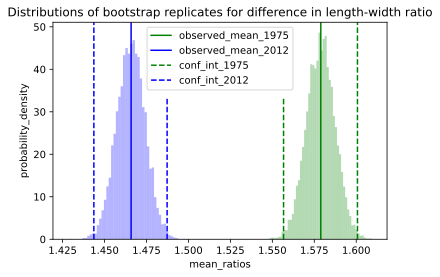

In [16]:
plt.hist(bs_replicates_1975_ratio, bins=50, density=True, alpha=0.3, color='g')
plt.hist(bs_replicates_2012_ratio, bins=50, density=True, alpha=0.3, color='b')

plt.axvline(x=mean_ratio_1975, color='g', label='observed_mean_1975')
plt.axvline(x=mean_ratio_2012, color='b', label='observed_mean_2012')
plt.axvline(x=conf_int_1975[0], color='g', label='conf_int_1975', linestyle='--', ymax=0.65)
plt.axvline(x=conf_int_1975[1], color='g', linestyle='--')
plt.axvline(x=conf_int_2012[0], color='b', label='conf_int_2012', linestyle='--')
plt.axvline(x=conf_int_2012[1], color='b', linestyle='--', ymax=0.65)

plt.title('Distributions of bootstrap replicates for difference in length-width ratio')
plt.xlabel('mean_ratios')
plt.ylabel('probability_density')
plt.legend()
plt.show()

Отношение высоты клюва к ширине с течением времени уменьшилось на ~0.1 (что соответствует снижению на 7 процентов). При этом 99% доверительные интервалы не пересекаются. Можно заключить, что с течением времени форма клюва вьюрков действительно меняется — они становятся выше (мощнее), но укорачиваются по длине. Необходимости в дополнительной проверке гипотезы тут нет.

### 4. Влияние наследуемости

Что заставляет клювы *Geospiza scandens* со временем увеличиваться в высоту и становиться мощнее? Возможно, дело действительно в засухе, уничтожившей мелкие и легкодоступные семена, в результате чего выживали и давали потомство только особи с высоким в основании мощным клювом, способные раскалывать крупные семена. Однако здесь появляется другой вопрос: а какой фактор отвечает за априорное наличие особей с мощным клювом в популяции? Объяснение состоит в том, что вьюрки вида *Geospiza scandens* спариваются с другими крупными вьюрками на Большом Дафни, *Geospiza fortis*, у которых клюв существенно крупнее и мощнее. Затем эти гибридные птицы спариваются с истинными *Geospiza scandens* и дают потомство в процессе, называемом интрогрессивной гибридизацией, который может привнести характеристики *fortis* в *scandens*. 

В общем смысле, интрогрессивная гибридизация — это передача виду-реципиенту от вида-донора одного или немногих селекционных признаков без изменения комплекса других его признаков.

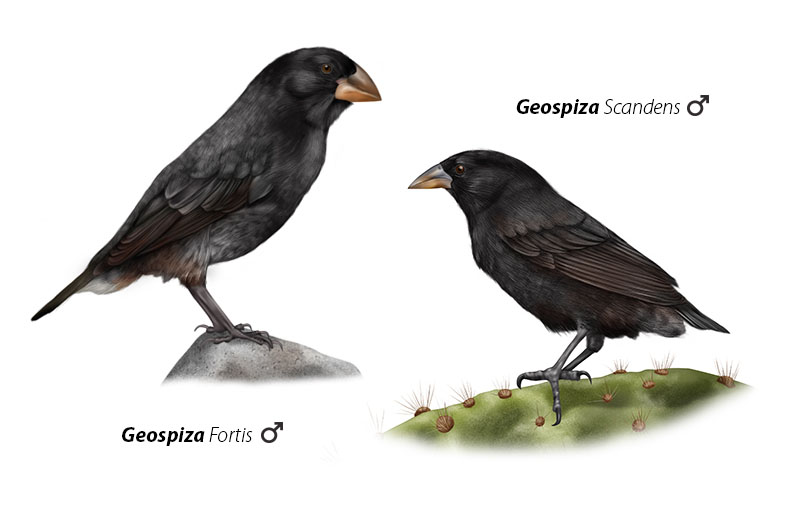

<center><b>Рис. 2.</b> Вьюрки видов <i>Geospiza fortis</i> и <i>Geospiza scandens</i>. <i>Geospiza fortis</i> имеет более мощный клюв. </center>
<center>Source: Rosa Marín Ribas, independent scientific and medical illustrator</center>

Чтобы подтвердить эту гипотезу, нам нужно знать, насколько сильно родительские черты передаются потомству, то есть каково влияние наследуемости признаков. В нашем распоряжении есть несколько дополнительных небольших датасетов. Numpy-массивы `bd_parent_fortis` и `bd_parent_scandens` содержат усредненные замеры высоты клюва у родительской пары для соответствующих видов, в то время как Numpy-массивы `bd_offspring_fortis` и `bd_offspring_scandens` содержат аналогичные данные для потомства этих родителей. 

Подгрузим эти данные:

In [17]:
bd_parent_scandens = np.load('bd_parent_scandens.npy')
bd_offspring_scandens = np.load('bd_offspring_scandens.npy')
bd_parent_fortis = np.load('bd_parent_fortis.npy')
bd_offspring_fortis = np.load('bd_offspring_fortis.npy')

#### 4.1 Предварительный разведочный анализ данных

Построим графики рассеяния, чтобы посмотреть, как высота клюва потомства (ось Y) варьирует по отношению к высоте клюва родительских особей (ось X). Нанесем на график точки сразу для обоих видов, чтобы можно было их визуально сравнить. 

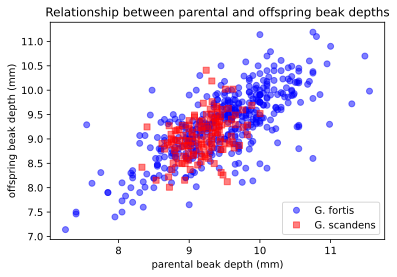

In [18]:
plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='o', 
         linestyle='none', color='blue', alpha=0.5, markersize=6)
plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='s', 
         linestyle='none', color='red', alpha=0.5, markersize=6)
plt.title('Relationship between parental and offspring beak depths')
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')
plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
plt.show()

Из графика следует, что корреляция между значениями мощности клюва потомства и родителей гораздо более ярко выражена у вида *Geospiza fortis* по сравнению с *Geospiza scandens*. Это, возможно, свидетельствует о том, что влияние наследственности выше именно у вида *Geospiza fortis*. Для проверки этого предположения вновь обратимся к методу бутстрэппинг.

#### 4.2 Расчет коэффициентов корреляции c доверительными интервалами

Чтобы более обоснованно говорить о корреляции между параметрами клюва родительских особей и их потомства, нам нужно рассчитать тестовую статистику, такую как коэффициент корреляции Пирсона. При этом, чтобы построить доверительные интервалы, мы вновь можем провести парный бутстрэппинг. Для этого можно использовать функцию, похожую на ту, что мы применяли ранее для многократной оценки параметров линейной регрессии, только в данном случае в функцию будет заложена возможность расчета коэффициента корреляции Пирсона.

In [19]:
def draw_bs_pairs(x, y, func, size=1):
    """Производит парный бутстрэппинг и считает тестовую статистику."""
    
    inds = np.arange(len(x))
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates


def pearson_r(x, y):
    """Рассчитывает коэффициент корреляции Пирсона."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]


###################################################################################################

np.random.seed(42)

# рассчитаем коэффициенты корреляции Пирсона для фактических данных
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# сгенерируем распределения из реплик коэффициентов корреляции методом парного бутстрэппинга
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

# построим 95% доверительные интервалы
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])
print(f'Observed Pearson r for G. scandens: {r_scandens}, 95% confidence interval: {conf_int_scandens}')
print(f'Observed Pearson r for G. fortis: {r_fortis}, 95% confidence interval: {conf_int_fortis}')

Observed Pearson r for G. scandens: 0.4117063629401258, 95% confidence interval: [0.26564228 0.54388972]
Observed Pearson r for G. fortis: 0.7283412395518486, 95% confidence interval: [0.6694112  0.77840616]


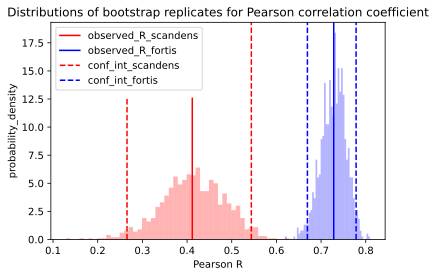

In [20]:
plt.hist(bs_replicates_scandens, bins=50, density=True, alpha=0.3, color='r')
plt.hist(bs_replicates_fortis, bins=50, density=True, alpha=0.3, color='b')

plt.axvline(x=r_scandens, color='r', label='observed_R_scandens', ymax=0.65)
plt.axvline(x=r_fortis, color='b', label='observed_R_fortis')
plt.axvline(x=conf_int_scandens[0], color='r', label='conf_int_scandens', linestyle='--', ymax=0.65)
plt.axvline(x=conf_int_scandens[1], color='r', linestyle='--')
plt.axvline(x=conf_int_fortis[0], color='b', label='conf_int_fortis', linestyle='--')
plt.axvline(x=conf_int_fortis[1], color='b', linestyle='--')

plt.title('Distributions of bootstrap replicates for Pearson correlation coefficient')
plt.xlabel('Pearson R')
plt.ylabel('probability_density')
plt.legend()
plt.show()

Из полученных данных однозначно следует, что высота клюва родительских особей *G. fortis* более сильно коррелирует с высотой клюва их потомства по сравнению с аналогичными данными для вида *G. scandens*.

#### 4.3 А как измерить наследуемость?

Отметим, что коэффициент корреляции Пирсона — это отношение ковариации к среднему геометрическому дисперсий двух наборов данных. Это мера корреляции между характеристиками родителей и потомства, однако это не лучшая оценка *наследуемости*. Будет более точно определить наследуемость как отношение ковариации между характеристиками родителей и потомства к дисперсии значений признака только родителей.

Создадим функцию, вычисляющую такой параметр. После этого вновь примененим парный бутстрэппинг.

In [21]:
def heritability(parents, offspring):
    """Вычисляет наследуемость как отношение ковариации между характеристиками родителей и потомства 
    к дисперсии значений признака только родителей."""
    covariance_matrix = np.cov(parents, offspring)
    
    return covariance_matrix[0, 1] / covariance_matrix[0, 0]

################################################################################

np.random.seed(42)

# вычислим наследуемость согласно фактическим данным
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# сгенерируем распределения реплик наследуемости
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)      
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# построим 95% доверительные интервалы
conf_int_scandens_h = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis_h = np.percentile(replicates_fortis, [2.5, 97.5])
print(f'Observed heridability for G. scandens: {heritability_scandens}, 95% confidence interval: {conf_int_scandens_h}')
print(f'Observed heridability for G. fortis: {heritability_fortis}, 95% confidence interval: {conf_int_fortis_h}')

Observed heridability for G. scandens: 0.5485340868685982, 95% confidence interval: [0.34395487 0.75638267]
Observed heridability for G. fortis: 0.7229051911438155, 95% confidence interval: [0.64655013 0.79688342]


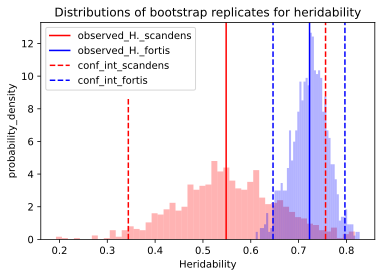

In [22]:
plt.hist(replicates_scandens, bins=50, density=True, alpha=0.3, color='r')
plt.hist(replicates_fortis, bins=50, density=True, alpha=0.3, color='b')

plt.axvline(x=heritability_scandens, color='r', label='observed_H._scandens')
plt.axvline(x=heritability_fortis, color='b', label='observed_H._fortis')
plt.axvline(x=conf_int_scandens_h[0], color='r', label='conf_int_scandens', linestyle='--', ymax=0.65)
plt.axvline(x=conf_int_scandens_h[1], color='r', linestyle='--')
plt.axvline(x=conf_int_fortis_h[0], color='b', label='conf_int_fortis', linestyle='--')
plt.axvline(x=conf_int_fortis_h[1], color='b', linestyle='--')

plt.title('Distributions of bootstrap replicates for heridability')
plt.xlabel('Heridability')
plt.ylabel('probability_density')
plt.legend()
plt.show()

Здесь мы также видим, что *G. fortis* имеют более высокий показатель наследуемости, чем *G. scandens*. Это означает, что признаки вида *G. fortis* могут сильно проявляться в *G. scandens* посредством интрогрессивной гибридизации.

#### 4.4 Есть ли вообще эффект наследуемости у *G. scandens*?

Мы обнаружили, что наследуемость признака у вида *G. scandens* существенно ниже, чем у вида *G. fortis*. Однако наблюдаемое некоторое cходство между родителями и потомством (по этому признаку) может быть случайным. Сформулируем нулевую гипотезу таким образом, что мощность клюва потомства *Geospiza scandens* не зависит от мощности клюва родителей (параметр heridability равен нулю). Иными словами, предположим, что по этому параметру выборки взяты из одного и того же распределения. Альтернативная гипотеза будет утверждать, что характеристики взаимосвязаны, и рассчитанное значение наследуемости (которое существенно больше нуля и составляет 0.55) не является случайным. Примем $\alpha$ = 0.05.

Для проверки гипотезы в данном случае мы можем провести перестановочное тестирование, многократно проводя перестановки родительской выборки и считая наследуемость. Для экономии вычислительных ресурсов, выборку потомства можно не изменять, так как необходимо и достаточно перестановки (рандомизации) только одной из выборок. В ходе этой процедуры мы разрываем имеющуюся связь в данных между родителями и их потомством, присваивая родительским особям другое потомство, то есть создавая пары в данных из фактически несвязанных (генетически) особей. 

P-значение в данном случае будет вероятностью получить значение наследуемости, равное или больше наблюдаемого, при условии, что верна нулевая гипотеза.

In [23]:
np.random.seed(42)

perm_replicates = np.empty(10000)

for i in range(10000):
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

p = np.mean(perm_replicates >= heritability_scandens)
print('p-val =', p)

p-val = 0.0


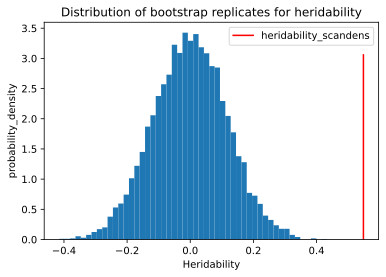

In [24]:
plt.hist(perm_replicates, bins=50, density=True)
plt.axvline(x=heritability_scandens, color='r', label='heridability_scandens', ymax=0.85)
plt.title('Distribution of bootstrap replicates for heridability')
plt.xlabel('Heridability')
plt.ylabel('probability_density')
plt.legend()
plt.show()

Мы получили p-значение, равное нулю (вернее, это очень низкое значение, стремящееся к нулю даже при очень большом количестве повторов эксперимента), и можем смело отклонить нулевую гипотезу. Как хорошо видно из графика, в ходе 10000 экспериментов, не было ни одного случая, когда рассчитанное значение наследуемости оказалось хотя бы равным наблюдаемому значению наследуемости, которое составляет 0.55. Таким образом, можно заключить, что наследуемость признака (мощность клюва) однозначно присутствует у вида *Geospiza scandens*, хоть и проявляется не так очевидно, как у *Geospiza fortis*.

### Заключение

В рамках реализации данного проекта мы провели исследование характерного признака галапагосских вьюрков с использованием нескольких статистических подходов. Нам удалось показать, что разница в средней мощности клюва между популяциями вьюрков *Geospiza scandens* 1975 г. и 2012 г. является статистически значимой, то есть клювы вьюрков становятся со временем мощнее. Мы также показали, что параметры клюва коррелируют у родителей и их потомства, причем это объясняется фактором наследуемости. Вьюрки вида *Geospiza fortis* лучше проявляют эффект наследуемости, в том числе и в другом виде *Geospiza scandens* посредством интрогрессивной гибридизации.